# Nonlinear Feature Transformation

## Motivation

- Most models work best when each feature is loosely Gaussian distributed.
- If the features are not Gaussian distributed, we can apply a nonlinear transformation to the features to make them more Gaussian distributed.
- This can help the model to learn the underlying patterns in the data more easily.

## Methods

- **Logarithmic Transformation**:
    $$
    \text{log}(x) \quad \text{where} \quad x > 0
    $$

    - This transformation is useful when the data is right-skewed.

- **Reciprocal Transformation**:
    $$
    \frac{1}{x} \quad \text{where} \quad x \neq 0
    $$

    - This transformation is useful when the data is left-skewed.

- **Square Root Transformation**:
    $$
    \sqrt{x} \quad \text{where} \quad x \geq 0
    $$

    - This transformation is useful when the data is right-skewed.

- **Exponential Transformation**:
    $$
    e^x
    $$

    - This transformation is useful when the data is right-skewed.

- **Box-Cox Transformation**:
    $$
    \begin{equation}
    y(\lambda) = \begin{cases}
    \frac{y^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
    \log(y) & \text{if } \lambda = 0
    \end{cases}
    \end{equation}
    $$

    - This transformation is useful when the data is right-skewed.
    - The parameter $\lambda$ must be greater than 0.
    - The parameter $\lambda$ can be found using maximum likelihood estimation.

## Example

- "How often did user A log in?"
    - Integer count data.
    - Right-skewed.
    - Apply a logarithmic transformation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

In [2]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [3]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

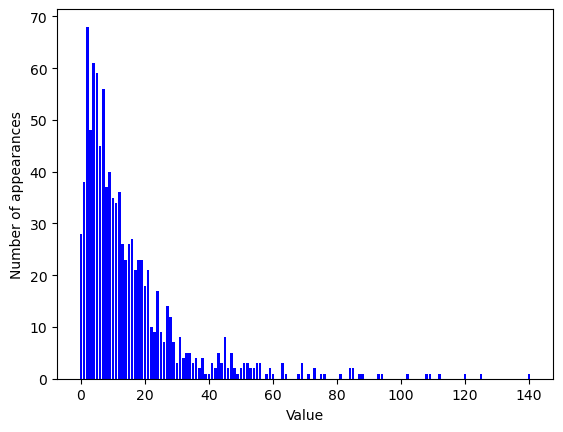

In [4]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [6]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

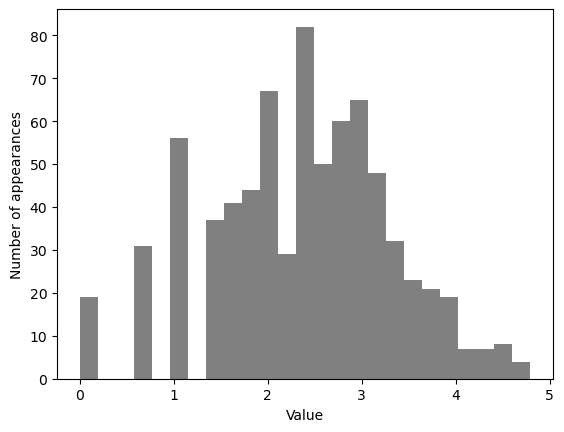

In [7]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [8]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


## Conclusion

- Nonlinear transformations can help to make the features more Gaussian distributed.
- This can help the model to learn the underlying patterns in the data more easily.
- With complex models, the need for feature transformation is reduced.